In [6]:
# Load the re-uploaded CSV files
train_data_path = '/content/cleaned_train_data.csv'
weather_data_path = '/content/cleaned_weather_data.csv'

# Load the datasets
train_data = pd.read_csv(train_data_path)
weather_data = pd.read_csv(weather_data_path)

# Perform the merge based on the specified columns
merged_data = pd.merge(
    train_data,
    weather_data,
    left_on='departure_scheduledTime_day',
    right_on='Day',
    how='inner'
)

# Save the merged file
merged_file_path = '/content/merged_train_weather_data.csv'
merged_data.to_csv(merged_file_path, index=False)


In [ ]:
# Standardize the column names for merging
weather_data['Day'] = weather_data['Day'].str.strip()

# Perform the merge on 'Month_Day' and 'Day' columns
merged_data = pd.merge(train_data, weather_data, left_on='departure_scheduledTime_day', right_on='Day', how='inner')

# Save the merged file
merged_output_file_path = '/mnt/data/merged_train_weather.csv'
merged_data.to_csv(merged_output_file_path, index=False)

# Display the first few rows of the merged data for verification
merged_data.head(), merged_output_file_path


In [9]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Extract the date and create a separate column for the month and day of the month
data['departure_scheduledTime'] = pd.to_datetime(data['departure_scheduledTime'], errors='coerce')
data['departure_month'] = data['departure_scheduledTime'].dt.month
data['departure_day'] = data['departure_scheduledTime'].dt.day

# Save the updated data for user review
updated_file_path = '/content/updated_train.csv'
data.to_csv(updated_file_path, index=False)

updated_file_path

'/content/updated_train.csv'

In [10]:
# Extract the date from 'departure_scheduledTime' and create a new column for Month and Day
train_data = pd.read_csv('/content/train.csv')
train_data['Month_Day'] = train_data['departure_scheduledTime'].str.extract(r'(\d{4}-\d{2}-\d{2})')
train_data['Month_Day'] = pd.to_datetime(train_data['Month_Day'], errors='coerce').dt.strftime('%B %d')

# Save the updated file
output_file_path = '/content/train_with_month_day.csv'
train_data.to_csv(output_file_path, index=False)

output_file_path


'/content/train_with_month_day.csv'

In [17]:
# Load the newly uploaded files
train_with_month_day_file_path = '/content/train_with_month_day.csv'
weather_file_path = '/content/weather.csv'

train_with_month_day_data = pd.read_csv(train_with_month_day_file_path)
weather_data = pd.read_csv(weather_file_path)

# Inspect the unique values in the relevant columns to troubleshoot
train_with_month_day_data['Month_Day'] = train_with_month_day_data['Month_Day'].str.strip()
weather_data['Day'] = weather_data['Day'].str.strip()

unique_month_days = train_with_month_day_data['Month_Day'].unique()
unique_weather_days = weather_data['Day'].unique()

unique_month_days, unique_weather_days
# Standardize the format of the 'Month_Day' column in train_with_month_day_data to match 'Day' in weather_data
train_with_month_day_data['Formatted_Month_Day'] = pd.to_datetime(
    train_with_month_day_data['Month_Day'], format='%B %d', errors='coerce'
).dt.strftime('%b %-d')

# Perform the merge using the standardized 'Formatted_Month_Day' and 'Day'
merged_data = pd.merge(
    train_with_month_day_data,
    weather_data,
    left_on='Formatted_Month_Day',
    right_on='Day',
    how='inner'
)

# Save the corrected merged data
corrected_merged_file_path = '/content/corrected_merged_train_weather.csv'
merged_data.to_csv(corrected_merged_file_path, index=False)

corrected_merged_file_path


'/content/corrected_merged_train_weather.csv'

In [13]:
# Load the newly uploaded file
new_weather_file_path = '/content/t_weather.csv'
weather_data = pd.read_csv(new_weather_file_path)

# Handling missing values: filling numerical columns with the median
weather_data = weather_data.apply(
    lambda x: x.fillna(x.median()) if x.dtypes != 'object' else x.fillna('Unknown')
)

# Save the cleaned data
cleaned_file_path = '/content/cleaned_weather_data.csv'
weather_data.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'/content/cleaned_weather_data.csv'

In [18]:
# Load the newly uploaded file
merged_file_path = '/content/corrected_merged_train_weather.csv'
merged_data = pd.read_csv(merged_file_path)

# Ensure date-time columns are properly formatted
merged_data['departure_scheduledTime'] = pd.to_datetime(merged_data['departure_scheduledTime'], errors='coerce')
merged_data['departure_actualTime'] = pd.to_datetime(merged_data['departure_actualTime'], errors='coerce')

# Calculate departure delay (actual time - scheduled time in minutes)
merged_data['Departure_Delay'] = (merged_data['departure_actualTime'] - merged_data['departure_scheduledTime']).dt.total_seconds() / 60

# Save the updated data with departure delay
delay_file_path = '/content/correct_with_delay.csv'
merged_data.to_csv(delay_file_path, index=False)

delay_file_path



'/content/correct_with_delay.csv'

In [20]:
# Load the newly uploaded file
delay_file_path = '/content/correct_with_delay.csv'
delay_data = pd.read_csv(delay_file_path)

# Ensure the scheduled time column is properly formatted as datetime
delay_data['departure_scheduledTime'] = pd.to_datetime(delay_data['departure_scheduledTime'], errors='coerce')

# Extract temporal features
delay_data['Day_of_Week'] = delay_data['departure_scheduledTime'].dt.day_name()
delay_data['Hour_of_Day'] = delay_data['departure_scheduledTime'].dt.hour
delay_data['Month_of_Year'] = delay_data['departure_scheduledTime'].dt.month_name()

# Save the updated data with temporal features
temporal_features_file_path = '/content/features.csv'
delay_data.to_csv(temporal_features_file_path, index=False)

temporal_features_file_path


'/content/features.csv'


# phase2


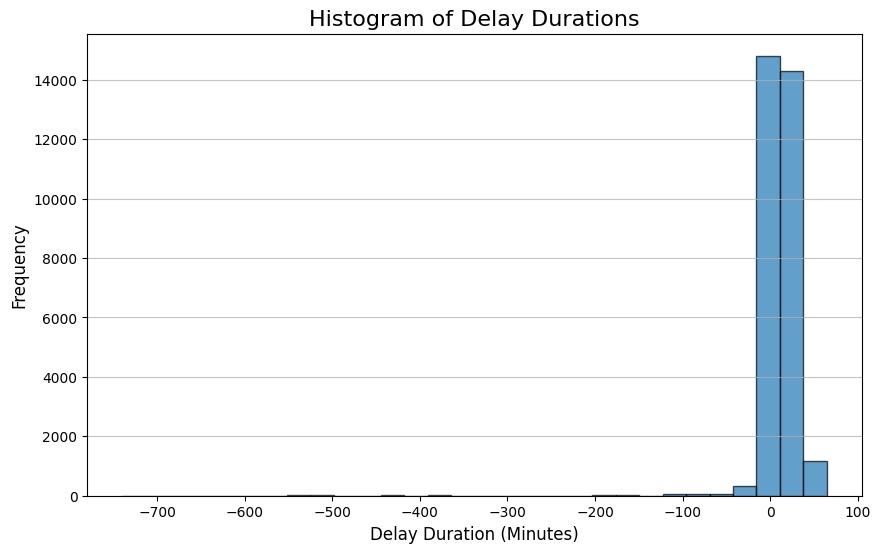

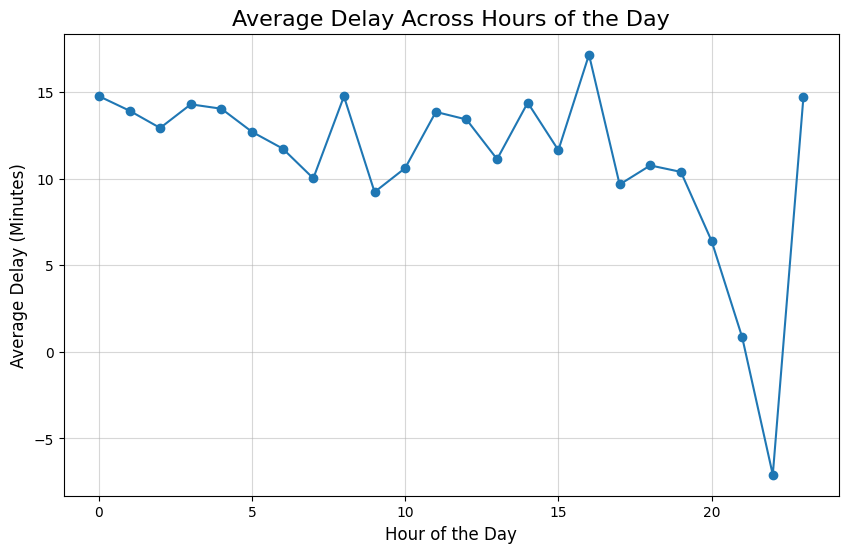

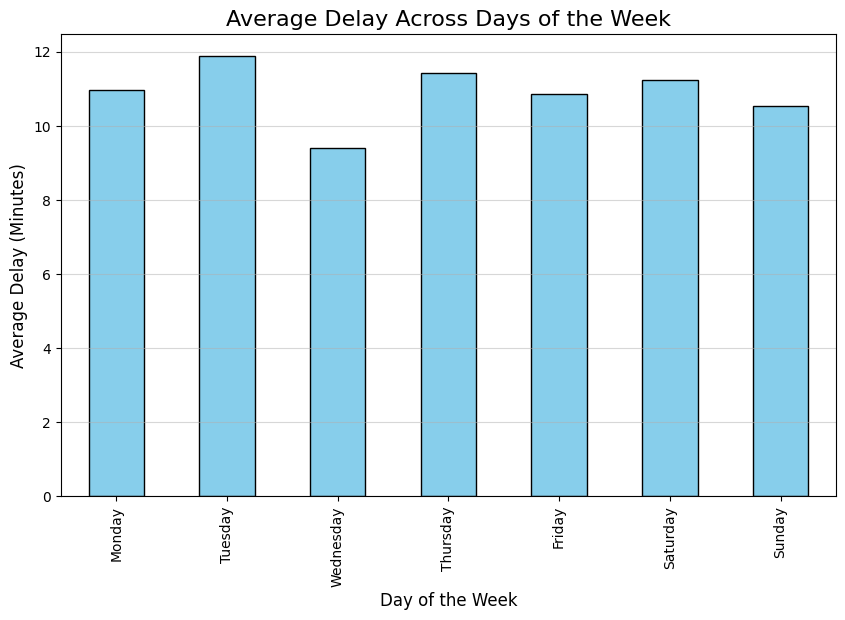

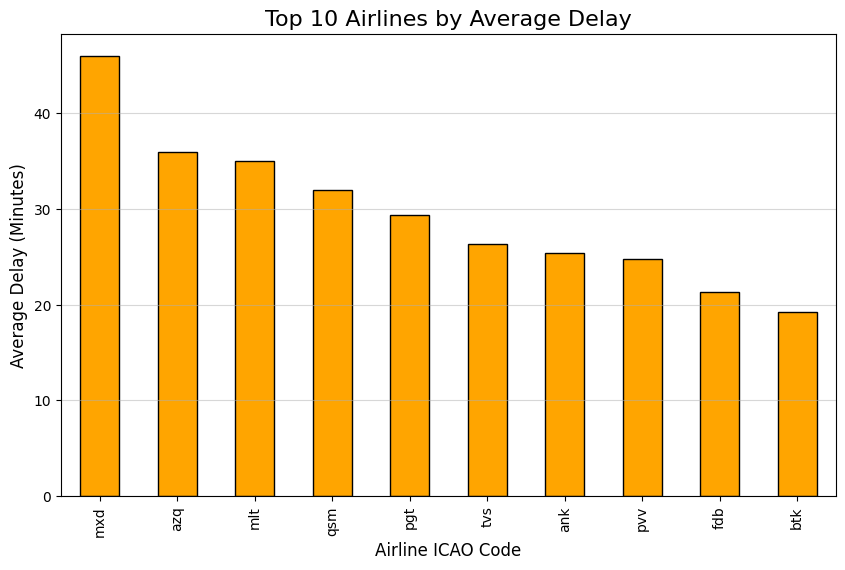

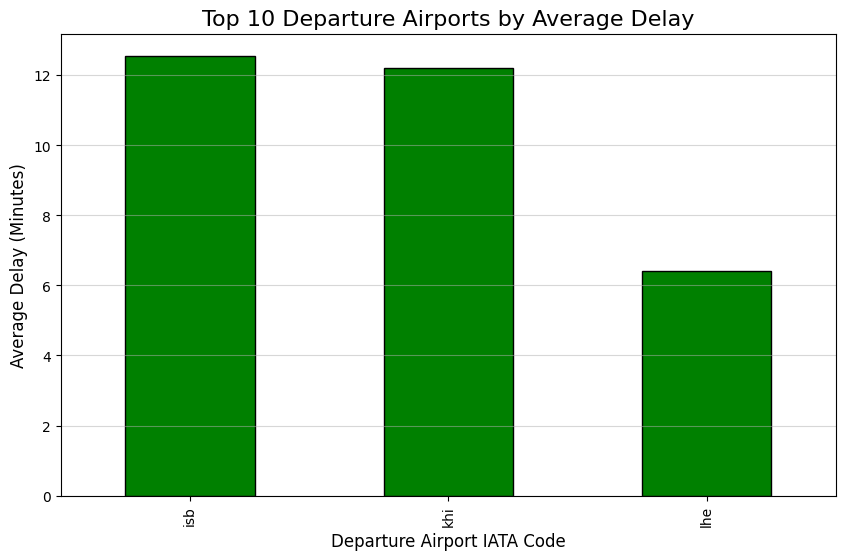

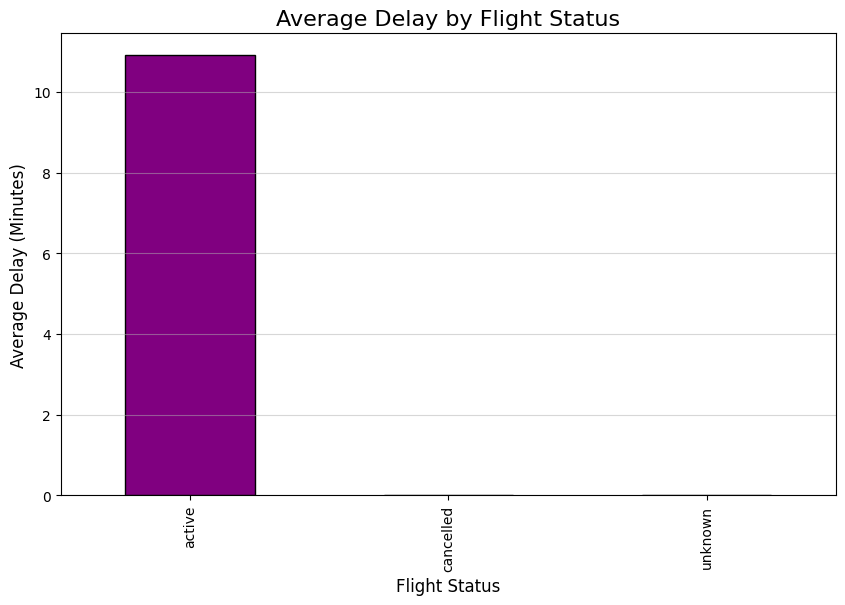

In [22]:
import matplotlib.pyplot as plt

# Load the newly uploaded file
features_file_path = '/content/features.csv'
features_data = pd.read_csv(features_file_path)

# Ensure the relevant columns are properly formatted
features_data['Departure_Delay'] = pd.to_numeric(features_data['Departure_Delay'], errors='coerce')
features_data['departure_scheduledTime'] = pd.to_datetime(features_data['departure_scheduledTime'], errors='coerce')
features_data['Day_of_Week'] = features_data['departure_scheduledTime'].dt.day_name()
features_data['Hour_of_Day'] = features_data['departure_scheduledTime'].dt.hour
features_data['Month_of_Year'] = features_data['departure_scheduledTime'].dt.month_name()

# Plot 1: Histogram of delay durations
plt.figure(figsize=(10, 6))
plt.hist(features_data['Departure_Delay'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Delay Durations', fontsize=16)
plt.xlabel('Delay Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot 2: Line plot showing delays across hours of the day
hourly_delays = features_data.groupby('Hour_of_Day')['Departure_Delay'].mean()
plt.figure(figsize=(10, 6))
hourly_delays.plot(kind='line', marker='o')
plt.title('Average Delay Across Hours of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.grid(axis='both', alpha=0.5)
plt.show()

# Plot 3: Bar chart showing delays across days of the week
daily_delays = features_data.groupby('Day_of_Week')['Departure_Delay'].mean()
daily_delays = daily_delays.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Ensure order
plt.figure(figsize=(10, 6))
daily_delays.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Average Delay Across Days of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot 4: Category-wise analysis by airline
airline_delays = features_data.groupby('airline_icaoCode')['Departure_Delay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
airline_delays.plot(kind='bar', color='orange', edgecolor='k')
plt.title('Top 10 Airlines by Average Delay', fontsize=16)
plt.xlabel('Airline ICAO Code', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot 5: Category-wise analysis by departure airport
airport_delays = features_data.groupby('departure_iataCode')['Departure_Delay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
airport_delays.plot(kind='bar', color='green', edgecolor='k')
plt.title('Top 10 Departure Airports by Average Delay', fontsize=16)
plt.xlabel('Departure Airport IATA Code', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot 6: Category-wise analysis by flight status
status_delays = features_data.groupby('status')['Departure_Delay'].mean()
plt.figure(figsize=(10, 6))
status_delays.plot(kind='bar', color='purple', edgecolor='k')
plt.title('Average Delay by Flight Status', fontsize=16)
plt.xlabel('Flight Status', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()


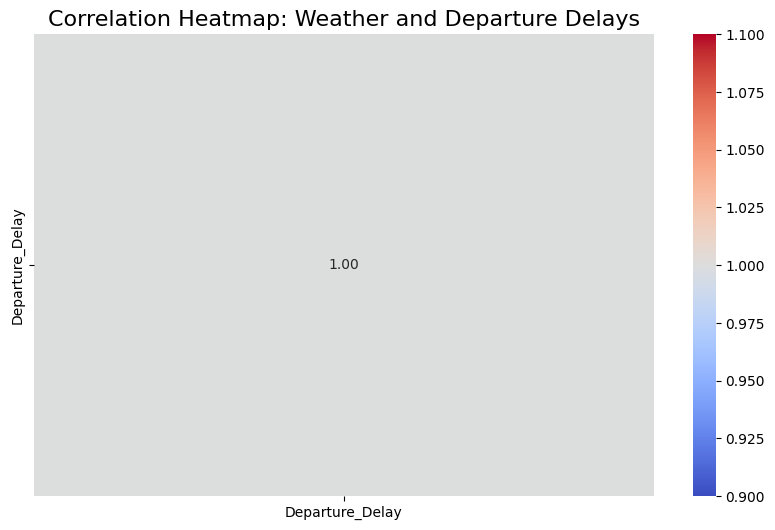

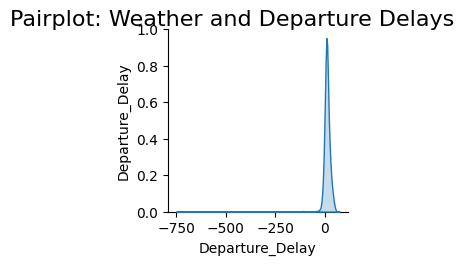

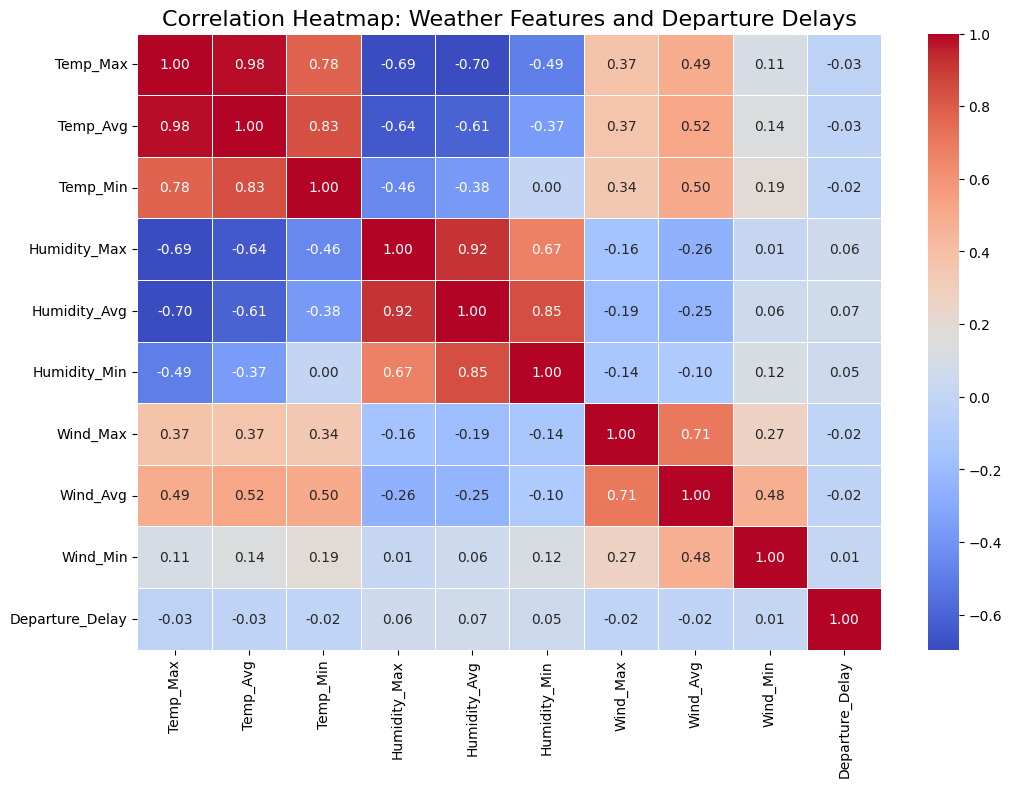

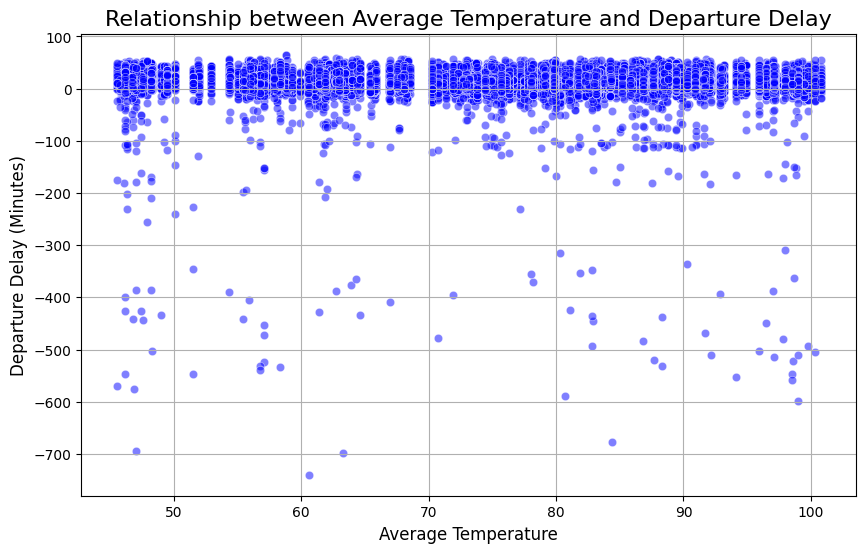

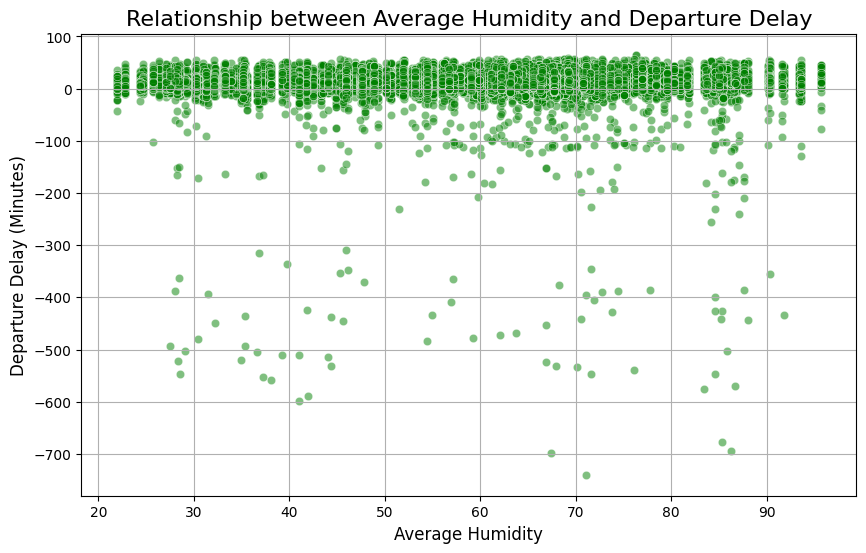

In [24]:
# Load the newly uploaded features file
features_file_path = '/content/features.csv'
features_data = pd.read_csv(features_file_path)

# Ensure numerical columns for weather data and delays are properly formatted
features_data['Departure_Delay'] = pd.to_numeric(features_data['Departure_Delay'], errors='coerce')

# Selecting potential weather-related columns for analysis (hypothetical examples, update based on actual data)
weather_columns = ['temperature', 'humidity', 'wind_speed']  # Example columns
weather_columns = [col for col in weather_columns if col in features_data.columns]

# Correlation heatmap
import seaborn as sns

plt.figure(figsize=(10, 6))
correlation_data = features_data[['Departure_Delay'] + weather_columns].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Weather and Departure Delays', fontsize=16)
plt.show()

# Scatter plots to show relationships
for column in weather_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=features_data[column], y=features_data['Departure_Delay'], alpha=0.5)
    plt.title(f'Relationship between {column.capitalize()} and Departure Delay', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Departure Delay (Minutes)', fontsize=12)
    plt.grid(True)
    plt.show()

# Pairplot for deeper insights
sns.pairplot(features_data[['Departure_Delay'] + weather_columns].dropna(), diag_kind='kde')
plt.suptitle('Pairplot: Weather and Departure Delays', y=1.02, fontsize=16)
plt.show()


# Selecting relevant columns for correlation analysis
weather_related_columns = [
    'Temp_Max', 'Temp_Avg', 'Temp_Min',
    'Humidity_Max', 'Humidity_Avg', 'Humidity_Min',
    'Wind_Max', 'Wind_Avg', 'Wind_Min',
    'Departure_Delay'
]

# Filtering only the relevant columns
correlation_data = features_data[weather_related_columns].corr()

# Plot 1: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Weather Features and Departure Delays', fontsize=16)
plt.show()

# Plot 2: Scatterplot for average temperature vs departure delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_data['Temp_Avg'], y=features_data['Departure_Delay'], alpha=0.5, color='blue')
plt.title('Relationship between Average Temperature and Departure Delay', fontsize=16)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Departure Delay (Minutes)', fontsize=12)
plt.grid(True)
plt.show()

# Plot 3: Scatterplot for average humidity vs departure delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_data['Humidity_Avg'], y=features_data['Departure_Delay'], alpha=0.5, color='green')
plt.title('Relationship between Average Humidity and Departure Delay', fontsize=16)
plt.xlabel('Average Humidity', fontsize=12)
plt.ylabel('Departure Delay (Minutes)', fontsize=12)
plt.grid(True)
plt.show()



# test data


In [25]:
# Load the newly uploaded file
test_file_path = '/content/test.csv'
test_data = pd.read_csv(test_file_path)

# Ensure the 'departure_scheduledTime' column is properly formatted
test_data['departure_scheduledTime'] = pd.to_datetime(test_data['departure_scheduledTime'], errors='coerce')

# Extract the month and day
test_data['Month_Day'] = test_data['departure_scheduledTime'].dt.strftime('%B %d')

# Save the updated file
updated_test_file_path = '/content/test1.csv'
test_data.to_csv(updated_test_file_path, index=False)

updated_test_file_path


'/content/test1.csv'

In [27]:
# Load the newly uploaded files
train_with_month_day_file_path = '/content/test1.csv'
weather_file_path = '/content/weather.csv'

train_with_month_day_data = pd.read_csv(train_with_month_day_file_path)
weather_data = pd.read_csv(weather_file_path)

# Inspect the unique values in the relevant columns to troubleshoot
train_with_month_day_data['Month_Day'] = train_with_month_day_data['Month_Day'].str.strip()
weather_data['Day'] = weather_data['Day'].str.strip()

unique_month_days = train_with_month_day_data['Month_Day'].unique()
unique_weather_days = weather_data['Day'].unique()

unique_month_days, unique_weather_days
# Standardize the format of the 'Month_Day' column in train_with_month_day_data to match 'Day' in weather_data
train_with_month_day_data['Formatted_Month_Day'] = pd.to_datetime(
    train_with_month_day_data['Month_Day'], format='%B %d', errors='coerce'
).dt.strftime('%b %-d')

# Perform the merge using the standardized 'Formatted_Month_Day' and 'Day'
merged_data = pd.merge(
    train_with_month_day_data,
    weather_data,
    left_on='Formatted_Month_Day',
    right_on='Day',
    how='inner'
)

# Save the corrected merged data
corrected_merged_file_path = '/content/finaltest.csv'
merged_data.to_csv(corrected_merged_file_path, index=False)

corrected_merged_file_path

'/content/finaltest.csv'

In [28]:
# Load the newly uploaded file
delay_file_path = '/content/finaltest.csv'
delay_data = pd.read_csv(delay_file_path)

# Ensure the scheduled time column is properly formatted as datetime
delay_data['departure_scheduledTime'] = pd.to_datetime(delay_data['departure_scheduledTime'], errors='coerce')

# Extract temporal features
delay_data['Day_of_Week'] = delay_data['departure_scheduledTime'].dt.day_name()
delay_data['Hour_of_Day'] = delay_data['departure_scheduledTime'].dt.hour
delay_data['Month_of_Year'] = delay_data['departure_scheduledTime'].dt.month_name()

# Save the updated data with temporal features
temporal_features_file_path = '/content/testproduct.csv'
delay_data.to_csv(temporal_features_file_path, index=False)

temporal_features_file_path

'/content/testproduct.csv'

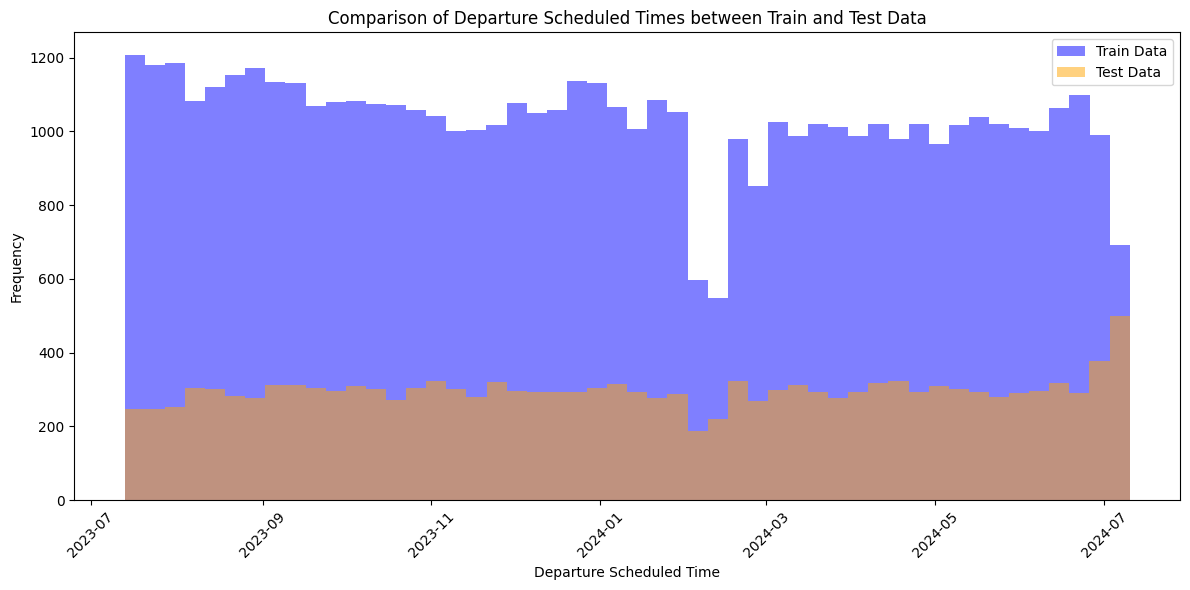

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
training_file_path = '/content/features.csv'
testing_file_path = '/content/testproduct.csv'

# Load the training and testing datasets
train_data = pd.read_csv(training_file_path)
test_data = pd.read_csv(testing_file_path)

# Convert `departure_scheduledTime` to datetime
train_data['departure_scheduledTime'] = pd.to_datetime(train_data['departure_scheduledTime'], errors='coerce')
test_data['departure_scheduledTime'] = pd.to_datetime(test_data['departure_scheduledTime'], errors='coerce')

# Plot the histogram for departure scheduled times in both datasets
plt.figure(figsize=(12, 6))

# Plot histogram for train data
plt.hist(train_data['departure_scheduledTime'].dropna(), bins=50, alpha=0.5, label='Train Data', color='blue')

# Plot histogram for test data
plt.hist(test_data['departure_scheduledTime'].dropna(), bins=50, alpha=0.5, label='Test Data', color='orange')

# Add labels and title
plt.xlabel('Departure Scheduled Time')
plt.ylabel('Frequency')
plt.title('Comparison of Departure Scheduled Times between Train and Test Data')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Accuracy: 0.84
Precision: 0.88
Recall: 0.94
F1-Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.27      0.33      1369
           1       0.88      0.94      0.91      7901

    accuracy                           0.84      9270
   macro avg       0.66      0.60      0.62      9270
weighted avg       0.82      0.84      0.82      9270



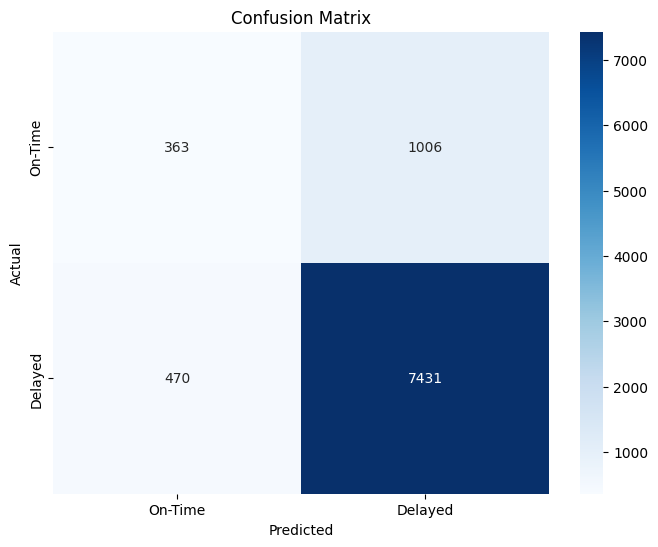

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
training_file_path = '/content/features.csv'

# Load the training dataset
train_data = pd.read_csv(training_file_path)

# Binary Classification Target
train_data['delay_status'] = (train_data['Departure_Delay'] > 0).astype(int)  # 1 for delayed, 0 for on-time

# Drop rows with missing values in the target or key features
train_data = train_data.dropna(subset=['Departure_Delay'])

# Select features for classification
features = ['Hour_of_Day', 'Wind_Avg', 'Pressure_Avg', 'Participation']  # Example features
X = train_data[features]
y = train_data['delay_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

# Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['On-Time', 'Delayed'], yticklabels=['On-Time', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.96

Classification Report:
                precision    recall  f1-score   support

      No Delay       0.29      0.16      0.21       182
   Short Delay       0.97      0.99      0.98      8947
Moderate Delay       0.18      0.06      0.09       141

      accuracy                           0.96      9270
     macro avg       0.48      0.41      0.43      9270
  weighted avg       0.94      0.96      0.95      9270



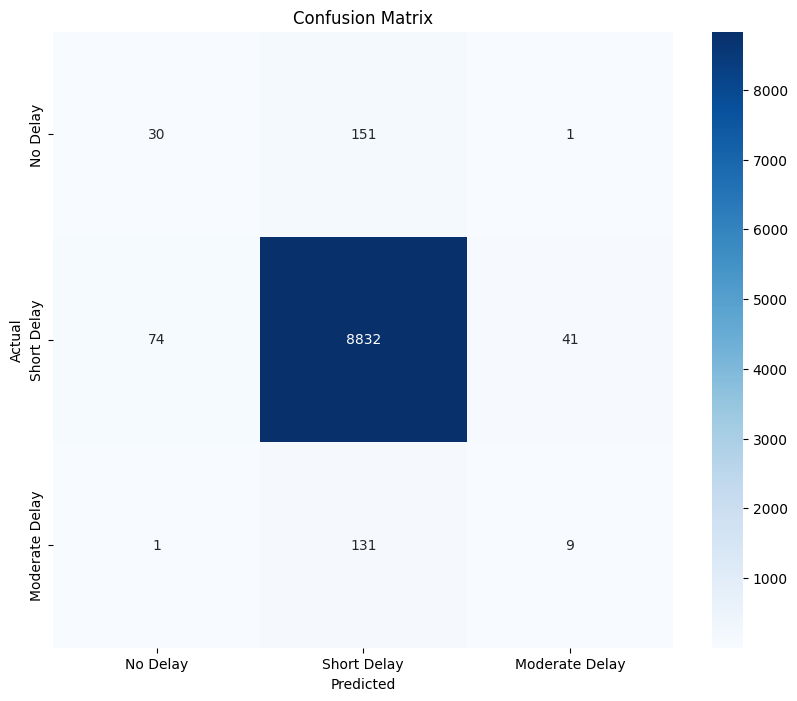

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
training_file_path = '/content/features.csv'

# Load the training dataset
train_data = pd.read_csv(training_file_path)

# Categorize flights into delay categories
def categorize_delay(delay):
    if delay == 0:
        return 0  # No Delay
    elif delay < 45:
        return 1  # Short Delay
    elif 45 <= delay <= 175:
        return 2  # Moderate Delay
    else:
        return 3  # Long Delay

# Apply the function to create target labels
train_data['delay_category'] = train_data['Departure_Delay'].apply(categorize_delay)

# Drop rows with missing target or important features
train_data = train_data.dropna(subset=['Departure_Delay'])

# Select features for classification
features = ['Hour_of_Day', 'Wind_Avg', 'Pressure_Avg', 'Participation']  # Example features
X = train_data[features]
y = train_data['delay_category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Dynamically determine the unique classes in the test data
unique_classes = sorted(y_test.unique())
target_names = ['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay']
target_names = [target_names[i] for i in unique_classes]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_classes)

# Results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Mean Absolute Error (MAE): 12.47
Root Mean Square Error (RMSE): 30.05
Cross-Validated RMSE (5-Fold): 35.23


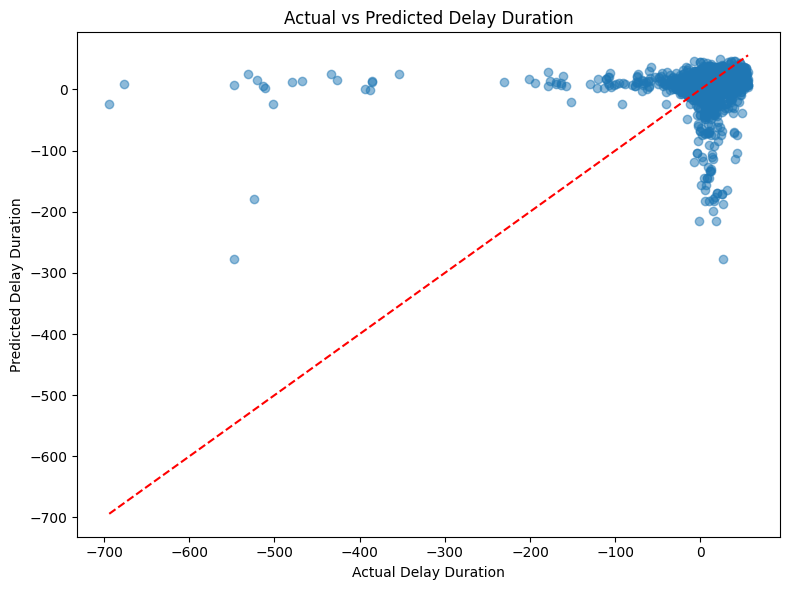

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# File paths
training_file_path = '/content/features.csv'

# Load the training dataset
train_data = pd.read_csv(training_file_path)

# Drop rows with missing values in key columns
train_data = train_data.dropna(subset=['Departure_Delay'])

# Select features for regression
features = ['Hour_of_Day', 'Wind_Avg', 'Pressure_Avg', 'Participation']  # Example features
X = train_data[features]
y = train_data['Departure_Delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Cross-validation (5-fold)
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Cross-Validated RMSE (5-Fold): {cv_rmse:.2f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Delay Duration')
plt.ylabel('Predicted Delay Duration')
plt.title('Actual vs Predicted Delay Duration')
plt.tight_layout()
plt.show()


Starting RandomizedSearchCV...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters (Randomized Search): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Randomized Search - MAE: 11.67, RMSE: 28.01
Starting GridSearchCV...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Hyperparameters (Grid Search): {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Grid Search - MAE: 11.64, RMSE: 27.58

Comparison of Model Performance:
Randomized Search - MAE: 11.67, RMSE: 28.01
Grid Search - MAE: 11.64, RMSE: 27.58


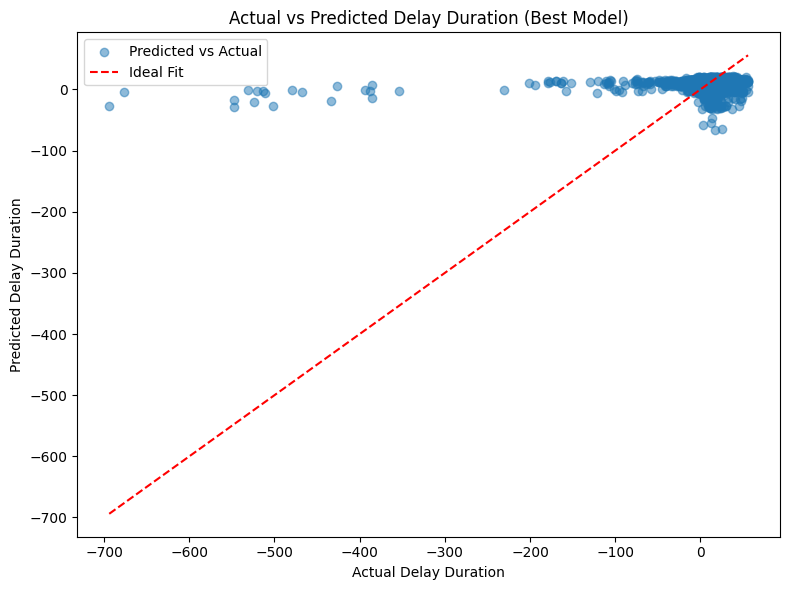

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
training_file_path = '/content/features.csv'
train_data = pd.read_csv(training_file_path)

# Drop rows with missing values in the target
train_data = train_data.dropna(subset=['Departure_Delay'])

# Feature selection
features = ['Hour_of_Day', 'Wind_Avg', 'Pressure_Avg', 'Participation']  # Replace with relevant features
X = train_data[features]
y = train_data['Departure_Delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to test
    cv=3,  # Use 3-fold cross-validation for faster evaluation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,  # Utilize all available processors
    verbose=2
)

# Perform Randomized Search
print("Starting RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Best parameters from Randomized Search
print("Best Hyperparameters (Randomized Search):", random_search.best_params_)

# Evaluate the best model from Randomized Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))
print(f"Randomized Search - MAE: {mae_random:.2f}, RMSE: {rmse_random:.2f}")

# Grid Search (Refined after Randomized Search)
refined_param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators']],
    'max_depth': [random_search.best_params_['max_depth'] - 5, random_search.best_params_['max_depth']],
    'min_samples_split': [random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=refined_param_grid,
    cv=3,  # Use 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Perform Grid Search
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Hyperparameters (Grid Search):", grid_search.best_params_)

# Evaluate the best model from Grid Search
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
print(f"Grid Search - MAE: {mae_grid:.2f}, RMSE: {rmse_grid:.2f}")

# Compare results
print("\nComparison of Model Performance:")
print(f"Randomized Search - MAE: {mae_random:.2f}, RMSE: {rmse_random:.2f}")
print(f"Grid Search - MAE: {mae_grid:.2f}, RMSE: {rmse_grid:.2f}")

# Plotting Actual vs Predicted for the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_grid, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Delay Duration')
plt.ylabel('Predicted Delay Duration')
plt.title('Actual vs Predicted Delay Duration (Best Model)')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Load the test dataset
test_file_path = '/content/Binary_Test_File.csv'
test_data = pd.read_csv(test_file_path)

# Check the columns in the test dataset
print("Columns in test dataset:", test_data.columns)

# Ensure the test dataset has the necessary features, if not, handle accordingly
# Let's check if all required features are present
required_features = ['Hour_of_Day', 'Wind_Avg', 'Pressure_Avg', 'Participation']

# Instead of using common_features, create the required features if they are not present
for feature in required_features:
    if feature not in test_data.columns:
        test_data[feature] = 0  # Or any suitable default value

test_features = test_data[required_features]


# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted') # Change average to 'weighted' or another suitable option
conf_matrix = confusion_matrix(y_test, y_pred)

# Make predictions using the best binary classification model

binary_predictions = clf.predict(test_features)

# Convert binary predictions to string format
binary_predictions_str = np.where(binary_predictions == 0, "on-time", "delayed")

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    "ID": test_data.index,  # Use the index column from the test dataset
    "delay": binary_predictions_str
})


# Save predictions to CSV
submission_file_path = '/content/Binary_Classification_Submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Predictions saved to {submission_file_path}")

Columns in test dataset: Index(['File Name', 'Flight Number', 'Type', 'Status', 'Departure IATA Code',
       'Departure ICAO Code', 'Scheduled Time', 'Arrival IATA Code',
       'Arrival ICAO Code', 'Arrival Estimated Time'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predictions saved to /content/Binary_Classification_Submission.csv


In [ ]:
# Load the test dataset
test_file_path = '/content/Multi_Test_File.csv'
test_data = pd.read_csv(test_file_path)

# Check the columns in the test dataset
print("Columns in test dataset:", test_data.columns)
# Step 1: Predict using the multi-class classification model (RandomForestClassifier)
y_pred_multiclass = rf_classifier.predict(X_test_scaled)


y_pred_multiclass_labels = y_pred_multiclass

# Step 2: Prepare submission DataFrame
submission_multiclass_df = pd.DataFrame({
    'Flight Number': test_data['flight_iata_number'],
    'Type': 'departure',
    'Status': 'active',
    'Departure IATA Code': test_data['departure_iata'],
    'Departure ICAO Code': test_data['departure_icao'],
    'Scheduled Time': test_data['departure_scheduled_time'].dt.strftime('%Y-%m-%d %H:%M:%S'),
    'Arrival IATA Code': test_data['arrival_iata'],
    'Arrival ICAO Code': test_data['arrival_icao'],
    'Arrival Estimated Time': pd.to_datetime(test_data['arrival_estimated_time']).dt.strftime('%Y-%m-%d %H:%M:%S'),
    'Delay': y_pred_multiclass_labels  # Convert numeric predictions to category labels
})

# Save the predictions to a CSV file in Kaggle multi-class classification format
submission_multiclass_df.to_csv('Kaggle_Submission_Multi_Class_Classification_Test.csv', index=False)

print("Multi-class classification submission file created: 'Kaggle_Submission_Multi_Class_Classification_Test.csv'")


In [ ]:
test_file_path = '/content/Regression_Test_File.csv'
test_data = pd.read_csv(test_file_path)
# Preprocess the test data (apply the same preprocessing steps as for the training data)
test_data['departure_scheduled_time'] = pd.to_datetime(test_data['departure_scheduled_time'])

# Create features (no departure delay since we are predicting it)
test_data['day_of_week'] = test_data['departure_scheduled_time'].dt.dayofweek

# Define the features used in the model
test_features = [
    'Temperature (°F)_Max', 'Temperature (°F)_Avg', 'Temperature (°F)_Min',
    'Humidity (%)_Max', 'Humidity (%)_Avg', 'Humidity (%)_Min',
    'Wind Speed (mph)_Max', 'Wind Speed (mph)_Avg', 'Wind Speed (mph)_Min',
    'Pressure (in)_Max', 'Pressure (in)_Avg', 'Pressure (in)_Min',
    'day_of_week',
]

test_categorical = ['airline_name', 'departure_iata', 'departure_icao', 'departure_terminal', 'arrival_iata', 'arrival_icao', 'flight_iata_number', 'flight_icao_number']

# Handle numerical and categorical features separately
X_test_numerical = test_data[test_features].fillna(test_data[test_features].median())  # Handle missing values
X_test_categorical = pd.get_dummies(test_data[test_categorical], drop_first=True)

X_test = pd.concat([X_test_numerical, X_test_categorical], axis=1)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 2: Scale the features (use the scaler from the training data)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Fit and transform test data (based on training data)

# Step 3: Predict the delays using the regression model (lin_reg)
y_pred_regression = lin_reg.predict(X_test_scaled)  # Predicted delay (in minutes)

# Step 4: Format Predictions for Kaggle Submission

submission_df = pd.DataFrame({
    'Flight Number': test_data['flight_iata_number'],
    'Type': 'departure',  # Assuming all flights are departures
    'Status': 'active',  # Assuming all flights are active
    'Departure IATA Code': test_data['departure_iata'],
    'Departure ICAO Code': test_data['departure_icao'],
    'Scheduled Time': test_data['departure_scheduled_time'].dt.strftime('%Y-%m-%d %H:%M:%S'),
    'Arrival IATA Code': test_data['arrival_iata'],
    'Arrival ICAO Code': test_data['arrival_icao'],
    'Arrival Estimated Time': pd.to_datetime(test_data['arrival_estimated_time']).dt.strftime('%Y-%m-%d %H:%M:%S'),
    'Delay': y_pred_regression  # For Regression model, use the predicted delay
})

# Save the predictions to a CSV file in Kaggle submission format
submission_df.to_csv('Kaggle_Submission_Regression_Test.csv', index=False)

print("Submission file created: 'Kaggle_Submission_Regression_Test.csv'")